# Bike Routes in Denver

In this notebook, we load the bike routes of Denver.

In [10]:
import numpy as np
import pandas as pd
import geopandas as gpd
import networkx as nx
import geonetworkx as gnx
import momepy # Used to build networks from GDF
import matplotlib.pyplot as plt

In [36]:
lanes = gpd.read_file("BS_lanes.geojson")
streets = gpd.read_file("BS_streets.geojson")
trails = gpd.read_file("BS_trails.geojson")

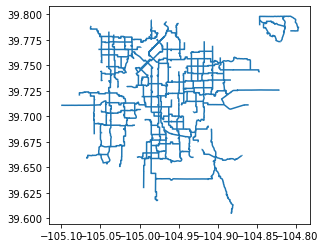

In [38]:
streets.plot()

In [41]:
bike_fac = gpd.read_file("existing_denver_bike_facilities.shp")

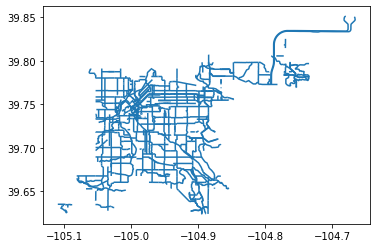

In [68]:
bike_fac.plot()

In [49]:
bike_shared_road = bike_fac[bike_fac["EXISTING_F"] == 'Shared Roadway']
bike_unpro_BL = bike_fac[bike_fac["EXISTING_F"] == 'Bike Lane']
bike_pro_BL = pd.concat([bike_fac[bike_fac["EXISTING_F"] == 'Buffered Bike Lane'], 
                         bike_fac[bike_fac["EXISTING_F"] == 'Shared Bike Lane']])
bike_path = pd.concat([bike_fac[bike_fac["EXISTING_F"] == 'Shared Use Path'], 
                       bike_fac[bike_fac["EXISTING_F"] == 'Neighborhood Bikeway']])

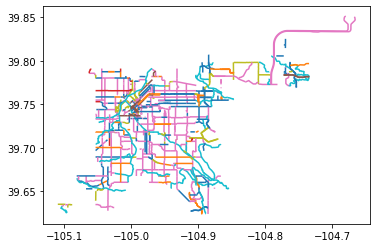

In [61]:
bike_fac.plot("EXISTING_F")

In [73]:
g_primal = momepy.gdf_to_nx(bike_fac, approach = 'primal')

/Users/westongrewe/opt/anaconda3/lib/python3.8/site-packages/momepy/utils.py:235: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


NotImplementedError: Multi-part geometries do not provide a coordinate sequence

In [81]:
multi = 0
for i in bike_fac.index:
    geom = bike_fac['geometry'][i]
    if geom.geom_type=='MultiLineString':
        print(geom)
        break
        multi += 1
multi

MULTILINESTRING ((-105.0111849656165 39.76203828587091, -105.0111890576313 39.76247170844664, -105.011194474651 39.76322598418875, -105.0111964426582 39.76370949994651, -105.011200249672 39.76443837559634, -105.0112007636739 39.76564010396515, -105.011200250672 39.76609546962061, -105.0112008416742 39.76639436070718, -105.0112012306756 39.7668486983589, -105.0112016966773 39.76805728975268, -105.0112020216785 39.76928681322255, -105.011204094686 39.76975419692167, -105.0112054846911 39.77006510205194, -105.0112077456993 39.77050606465502, -105.0112099187072 39.77095972330432, -105.0112143847234 39.77172256807756, -105.0112211827481 39.7729150604128), (-105.0112191577408 39.77291426140988, -105.0112261237661 39.77412962582827), (-105.0112339277944 39.7741177437851, -105.0112254957638 39.77532708718161), (-105.0112254957638 39.77532708718161, -105.0112254537636 39.77533304320326), (-105.0112254957638 39.77532708718161, -105.0111784175926 39.77654222459915, -105.011154583506 39.7777455459

0

In [78]:
multi_bike_fac = bike_fac[bike_fac['geometry'].geom_type == 'MultiLineString']

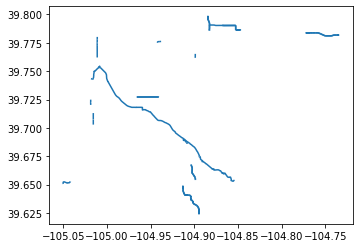

In [79]:
multi_bike_fac.plot()